# Level Acceleration

This notebook demonstrates the calculation of climb performance from a level acceleration test using the energy height calculation.

Some common notebook setup.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Load in the data.

In [2]:
data = np.genfromtxt('TestPoint1-Dynon.csv', delimiter=',', names=True)

Generate 0 based time values.

In [3]:
time = data['GPSSecondsToday'] - data[0]['GPSSecondsToday']

Take a look at the IAS and altitude during the test point.

In [4]:
# List converted field names. Looks like spaces and '(' ')' are converted to _
#data.dtype.names

<IPython.core.display.Javascript object>


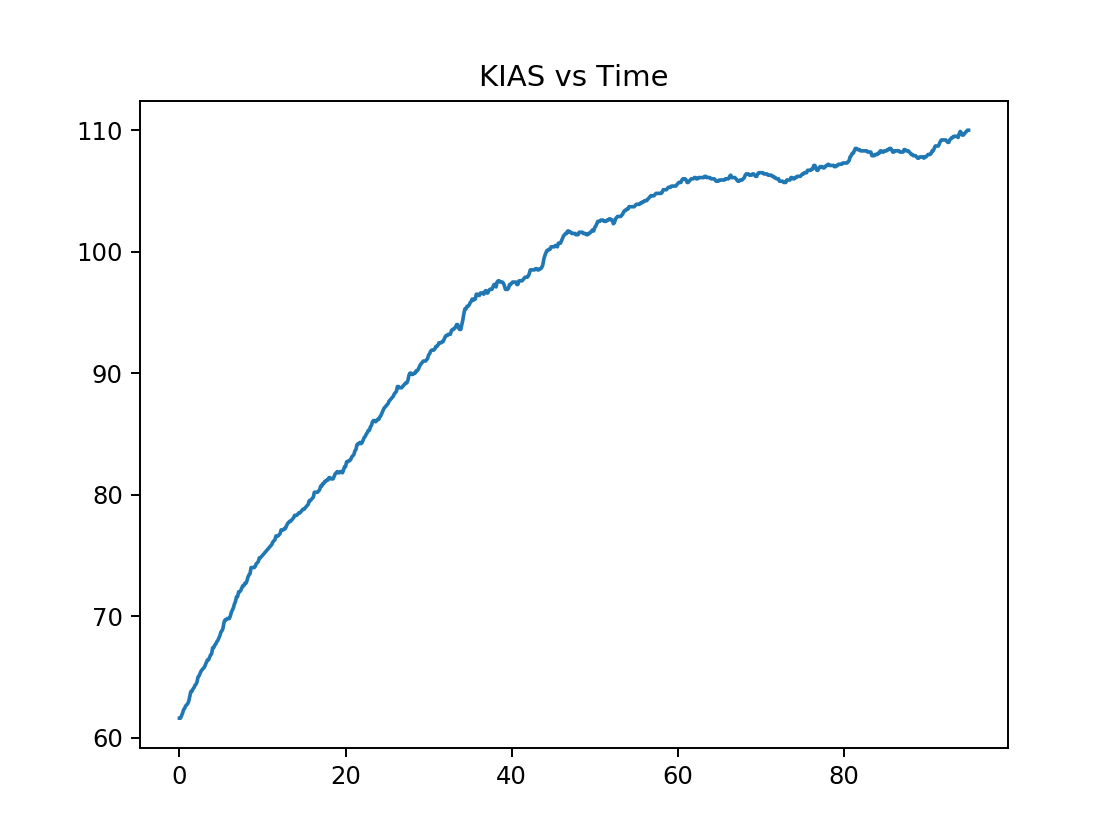

<IPython.core.display.Javascript object>


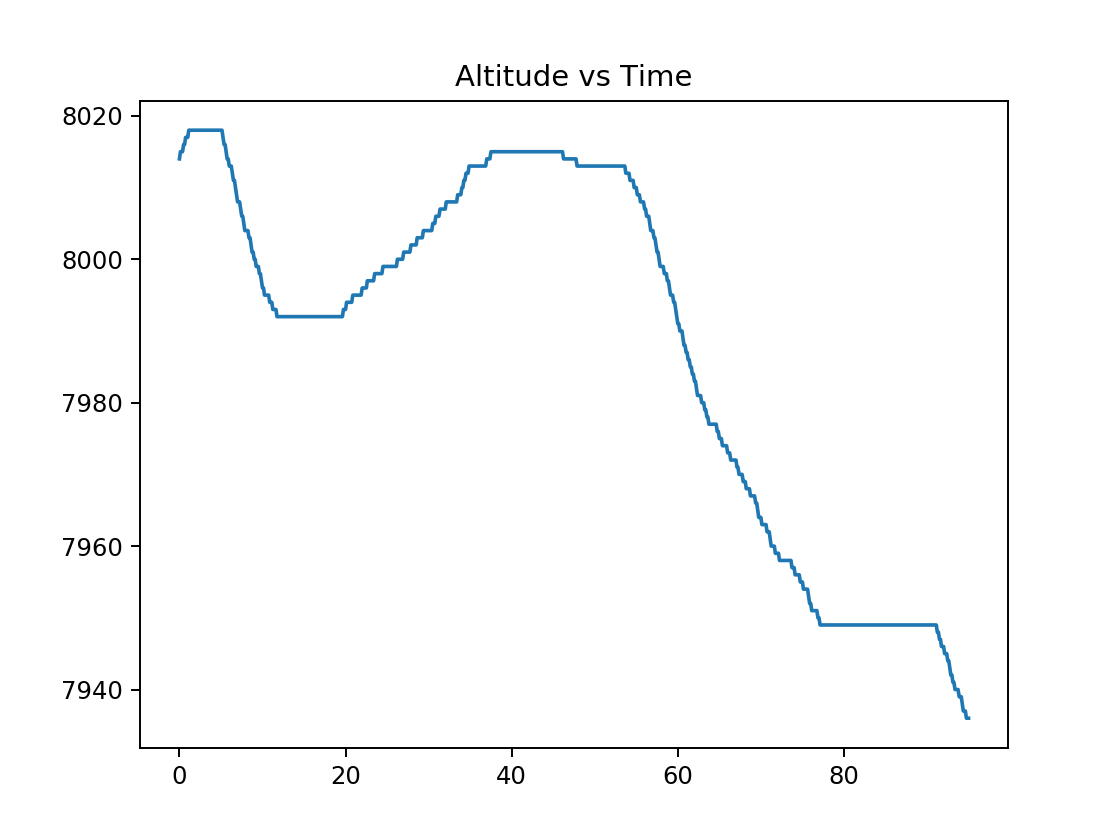

In [5]:
plt.figure()
plt.title("KIAS vs Time")
plt.plot(time, data['Indicated_Airspeed_knots'])

plt.figure()
plt.title("Altitude vs Time")
plt.plot(time, data['Pressure_Altitude_ft']);

Calculate TAS from IAS, assuming ISA standard day and pressure altitude of 8000ft.

In [6]:
TASData = data["Indicated_Airspeed_knots"] * 1.127

Let's create a 4th order polynomial in order to smooth out the noise in the TAS data.

In [7]:
TASPoly = np.polyfit(time, TASData, 4)
TASPoly

array([ 9.40476046e-07, -1.30819906e-04, -3.69978703e-03,  1.27863355e+00,
        7.09325264e+01])

Generate smoothed TAS data from the polynomial coefficients.

In [8]:
TASSmoothedData = TASPoly[0] * time**4 + TASPoly[1] * time**3 + TASPoly[2] * time**2 + TASPoly[3] * time + TASPoly[4]

Plot of the TAS data including the smoothed polynomial fit.

<IPython.core.display.Javascript object>


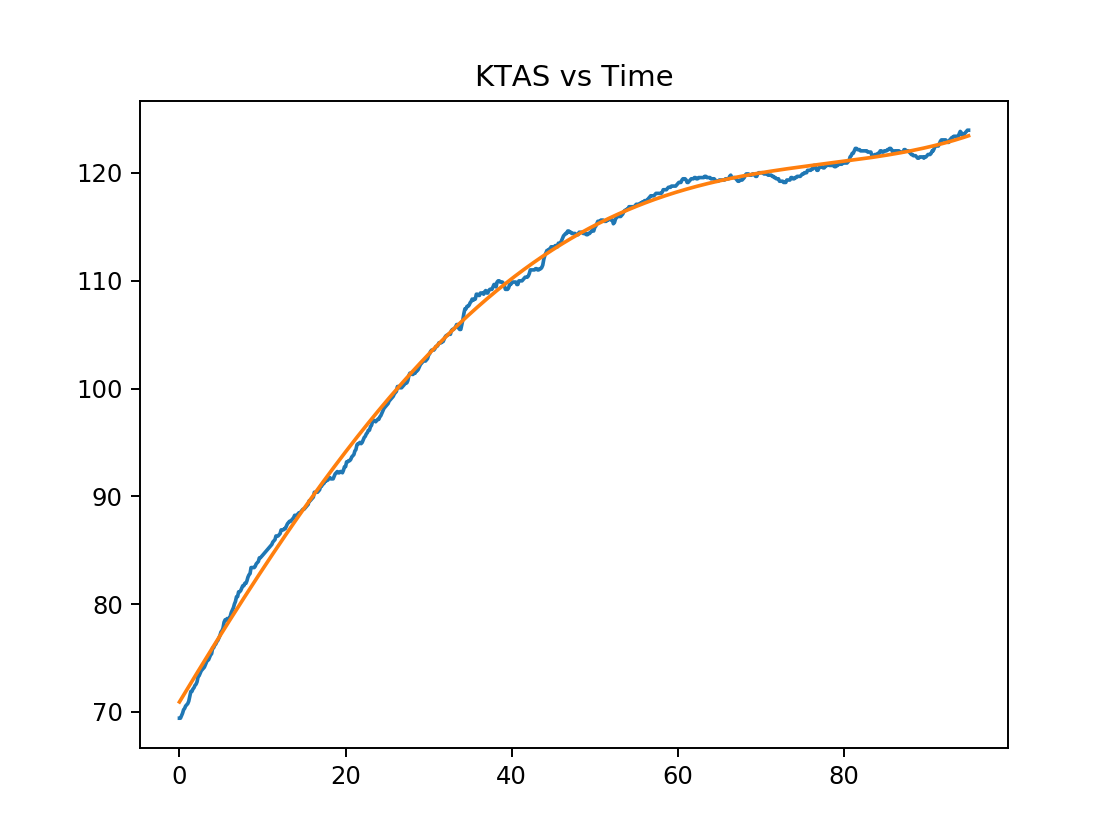

In [9]:
plt.figure()
plt.title("KTAS vs Time")
plt.plot(time, TASData)
plt.plot(time, TASSmoothedData);

Now calculate energy height:

$ \Large h_e = h + \frac{V_t^2}{2g}$

In [10]:
g = 32.2           # ft/s^2
ktTofps = 1.68     # conversion from kt to ft/s

heData = data['Pressure_Altitude_ft'] + ((TASSmoothedData * ktTofps)**2) / (2 * g)

Calculate a 3rd order polynomial fit for the energy height data..

In [11]:
hePoly = np.polyfit(time, heData, 3)
hePoly

array([ 6.21493266e-05, -8.55390238e-02,  1.14791553e+01,  8.20616894e+03])

In [12]:
heSmoothedData = hePoly[0] * time**3 + hePoly[1] * time**2 + hePoly[2] * time + hePoly[3]

<IPython.core.display.Javascript object>


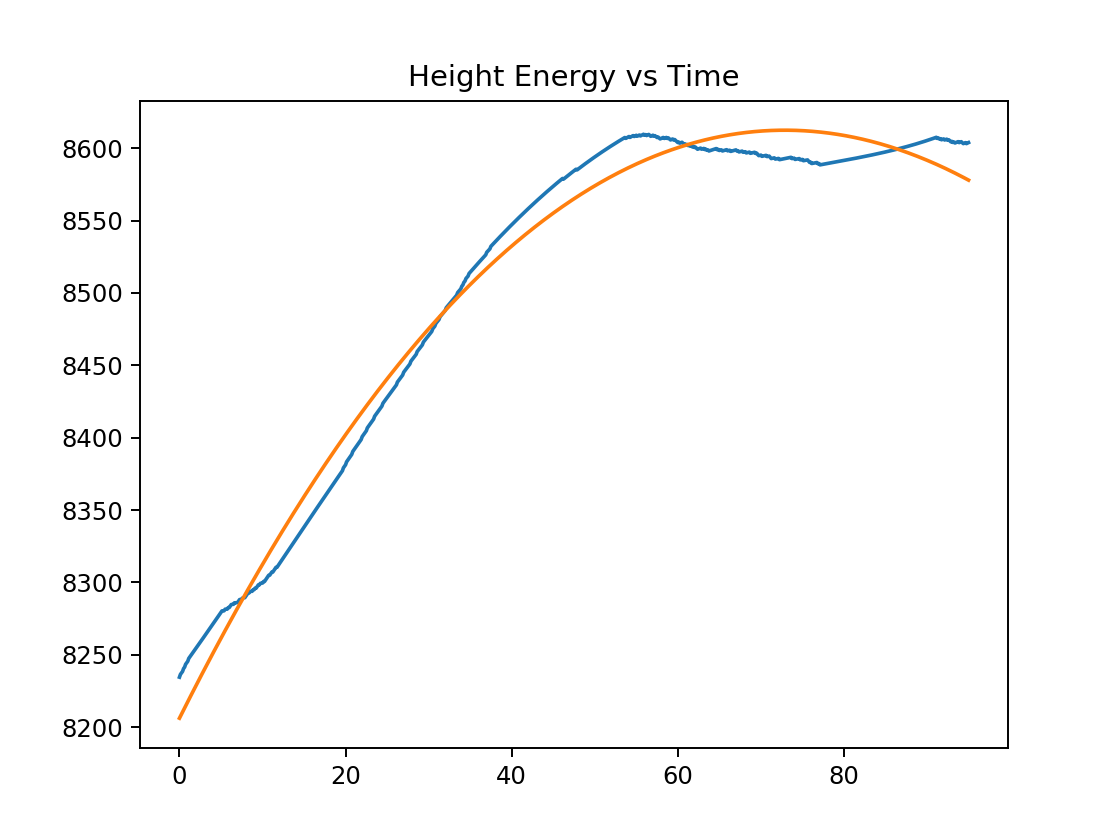

In [13]:
plt.figure()
plt.title("Height Energy vs Time")
plt.plot(time, heData)
plt.plot(time, heSmoothedData);

Now calculate excess power in ft/sec:

$\Large P_s = \frac{\mathrm{d} h_e}{\mathrm{d}t}$

In [14]:
dhedtPoly = [ 3*hePoly[0], 2*hePoly[1], 1*hePoly[2] ]
dhedtPoly

[0.00018644797978299441, -0.17107804766953072, 11.47915533368612]

In [15]:
PsData = (dhedtPoly[0] * time**2 + dhedtPoly[1] * time + dhedtPoly[2]) * 60  # fps to fpm

<IPython.core.display.Javascript object>


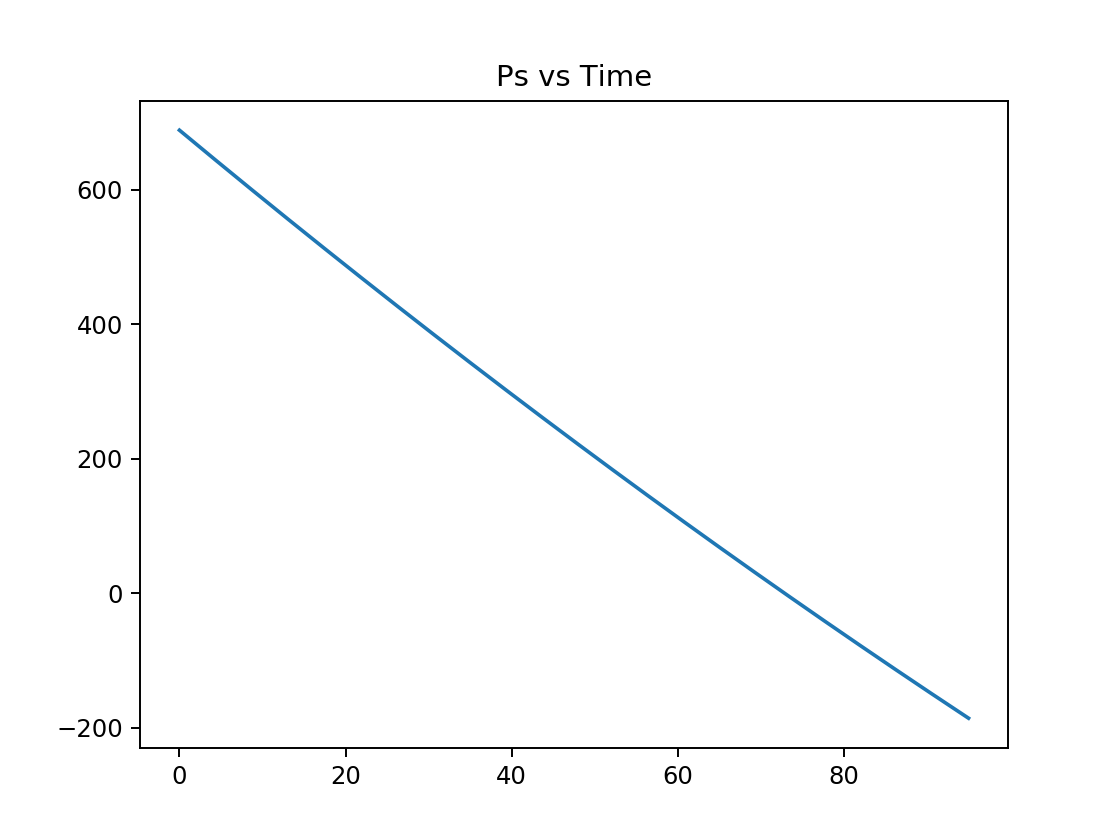

In [16]:
plt.figure()
plt.title("Ps vs Time")
plt.plot(time, PsData)

Generate smoothed IAS data from the smoothed TAS data. Again assuming ISA standard day at 8000ft.

In [17]:
IASSmoothedData = TASSmoothedData / 1.127

Finally plot Ps vs KIAS

<IPython.core.display.Javascript object>


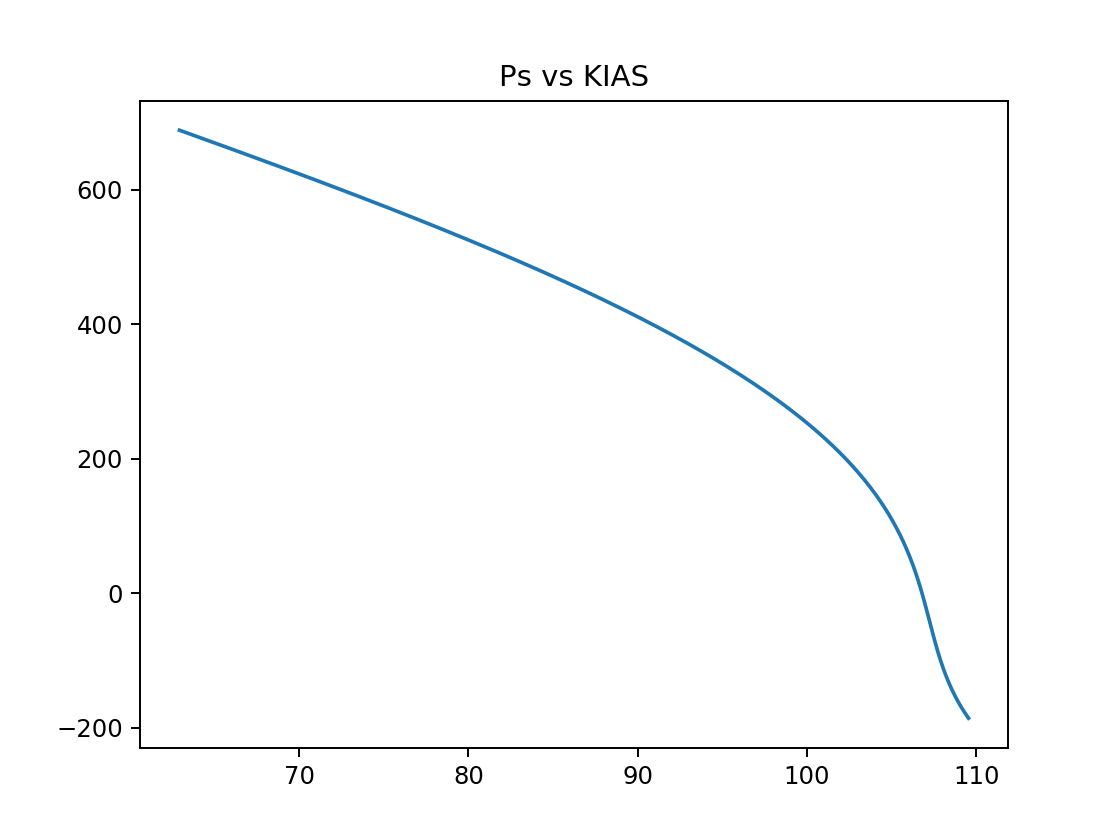

In [18]:
plt.figure()
plt.title("Ps vs KIAS")
plt.plot(IASSmoothedData, PsData);

<IPython.core.display.Javascript object>


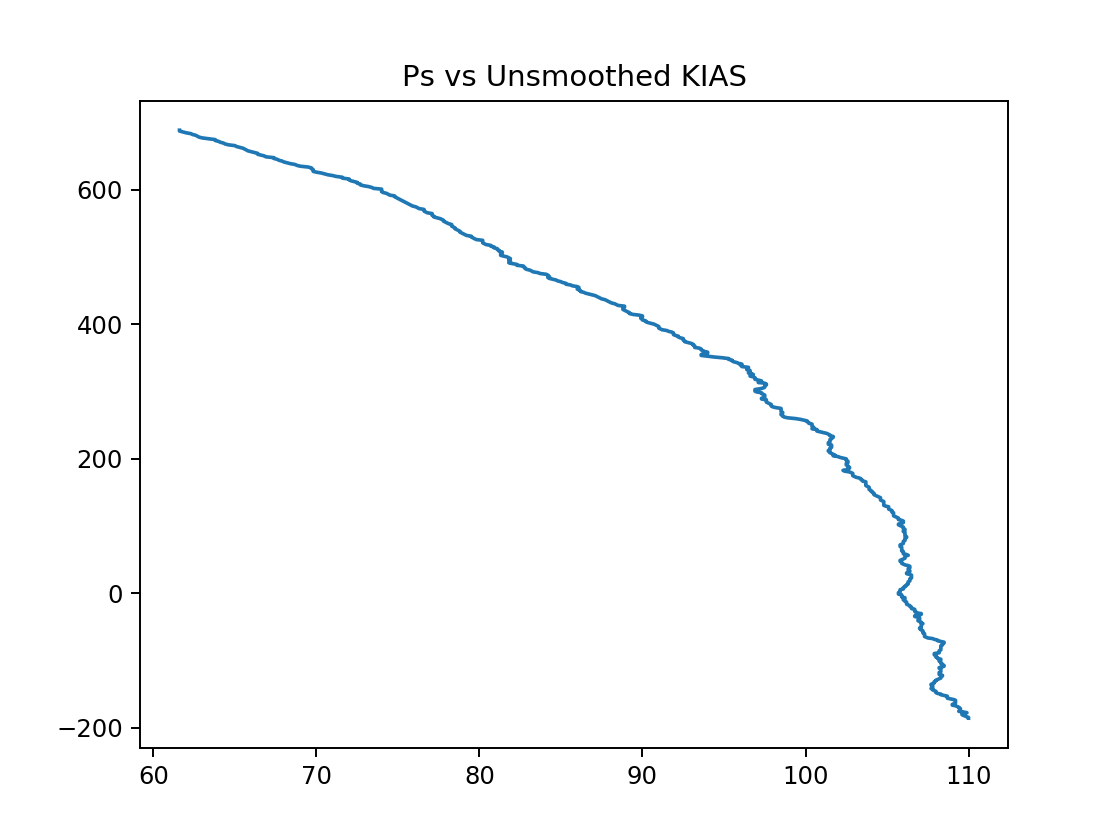

In [20]:
plt.figure()
plt.title("Ps vs Unsmoothed KIAS")
plt.plot(data["Indicated_Airspeed_knots"], PsData);